# Queries
Marvin Queries are a tool designed to remotely query the MaNGA dataset in global and local galaxy properties, and retrieve only the results you want.  Let's learn the basics of how to construct a query and also test drive some of the more advanced features that are unique to the Marvin-tools version of querying.

In [1]:
# Python 2/3 compatibility
from __future__ import print_function, division, absolute_import
# import matplolib just in case
import matplotlib.pyplot as plt

# this line tells the notebook to plot matplotlib static plots in the notebook itself
%matplotlib inline

# this line does the same thing but makes the plots interactive 
#%matplotlib notebook

In [2]:
# Import the config and set to remote.  Let's query MPL-5 data
from marvin import config

# by default the mode is set to 'auto', but let's set it explicitly to remote.
config.mode = 'remote'

# by default, Marvin uses the latest MPL but let's set it explicitly to MPL-5
config.setRelease('MPL-5')

# By default the API will query using the Utah server, at api.sdss.org/marvin2.  See the config.sasurl attribute.
config.sasurl

# If you are using one of the two local ngrok Marvins, you need to switch the SAS Url to one of our ngrok ids.  
# Uncomment out the following lines and replace the ngrokid with the provided string
#ngrokid = 'ngrok_number_string'
#config.switchSasUrl('local', ngrokid=ngrokid)
#print(config.sasurl)

INFO: No release version set. Setting default to MPL-5


'https://api.sdss.org/marvin2/'

In [2]:
# this is the Query tool
from marvin.tools.query import Query

INFO: No release version set. Setting default to MPL-5


The Marvin Query object allows you to specify a string search condition with which you want to look for results.  It will construct the necessary SQL syntax for you, send it to the database at Utah using the Marvin API, and return the results. The Query accepts as a keyword argument **search_filter**.

Let's try searching for all galaxies with a redshift < 0.1.  

In [4]:
# the string search condition
my_search = 'z < 0.1'

The above string search condition is a pseudo-natural language format.  Natural language in that you type what you mean to say, and pseudo because it still must be formatted in the standard SQL where condition syntax.  This syntax generally takes the form of **parameter_name operand value**. 

Marvin is smart enough to figure out which database table a parameter_name belongs to **if and only if** that name is a unique parameter name.  If not you must specify the database table name along with the parameter name, in the form of **table.parameter_name**.  Most MaNGA global properties come from the NASA-Sloan Atlas (NSA) catalog used for target selection. The database table name thus is **nsa**.  So the full parameter_name for redshift is **nsa.z**.

If a parameter name is not unique, then Marvin will return an error asking you to fine-tune your parameter name by using the full parameter **table.parameter_name** 

In [5]:
# the search condition using the full parameter name 
my_search = 'nsa.z < 0.1'

# Let's setup the query.  This will not run it automatically. 
q = Query(search_filter=my_search)
print(q)

Your parsed filter is: 
nsa.z<0.1
Marvin Query(mode='remote', limit=100, sort=None, order='asc')


Running the query produces a Marvin **`Results`** object (**`r`**):

In [6]:
# To run the query
r = q.run()

Results contain of a total of 2491, only returning the first 100 results


For number of results < 1000, Marvin will return the entire set of results. For queries that return > 1000, Marvin will paginate the results and only return the first 100, by default.  (This can be modified with the **limit** keyword).

In [7]:
# Print result counts
print('total', r.totalcount)
print('returned', r.count)

total 2491
returned 100


It can be useful for informational and debugging purposes to see the raw SQL of your query, and your query runtime.  If your query times out or crashes, the Marvin team will need these pieces of info to assess anything.

In [8]:
# See the raw SQL
print(r.showQuery())

SELECT mangadatadb.cube.mangaid AS "cube.mangaid", mangadatadb.cube.plate AS "cube.plate", concat(mangadatadb.cube.plate, '-', mangadatadb.ifudesign.name) AS "cube.plateifu", mangadatadb.ifudesign.name AS "ifu.name", mangasampledb.nsa.z AS "nsa.z" 
FROM mangadatadb.cube JOIN mangadatadb.ifudesign ON mangadatadb.ifudesign.pk = mangadatadb.cube.ifudesign_pk JOIN mangasampledb.manga_target ON mangasampledb.manga_target.pk = mangadatadb.cube.manga_target_pk JOIN mangasampledb.manga_target_to_nsa ON mangasampledb.manga_target.pk = mangasampledb.manga_target_to_nsa.manga_target_pk JOIN mangasampledb.nsa ON mangasampledb.nsa.pk = mangasampledb.manga_target_to_nsa.nsa_pk JOIN mangadatadb.pipeline_info AS drpalias ON drpalias.pk = mangadatadb.cube.pipeline_info_pk 
WHERE mangasampledb.nsa.z < 0.1 AND drpalias.pk = 25


In [9]:
# See the runtime of your query.  This produces a Python datetime.timedelta object showing days, seconds, microseconds
print('timedelta', r.query_runtime)
# See the total time in seconds
print('query time in seconds:', r.query_runtime.total_seconds())

timedelta 0:00:00.240311
query time in seconds: 0.240311


Query results are stored in **r.results**.  This is a Python list object, and be indexed like an array. Since we have 100 results, let's only look at 10 for brevity.

In [10]:
# Show the results. 
r.results[0:10]

[NamedTuple(mangaid=u'1-22286', plate=7992, plateifu=u'7992-12704', name=u'12704', z=0.099954180419445),
 NamedTuple(mangaid=u'1-22298', plate=7992, plateifu=u'7992-12702', name=u'12702', z=0.0614774264395237),
 NamedTuple(mangaid=u'1-22333', plate=7992, plateifu=u'7992-3704', name=u'3704', z=0.0366250574588776),
 NamedTuple(mangaid=u'1-22347', plate=7992, plateifu=u'7992-3701', name=u'3701', z=0.0437936186790466),
 NamedTuple(mangaid=u'1-22383', plate=7992, plateifu=u'7992-3702', name=u'3702', z=0.0542150922119617),
 NamedTuple(mangaid=u'1-22412', plate=7992, plateifu=u'7992-9101', name=u'9101', z=0.0190997123718262),
 NamedTuple(mangaid=u'1-22414', plate=7992, plateifu=u'7992-6103', name=u'6103', z=0.0922721400856972),
 NamedTuple(mangaid=u'1-22438', plate=7992, plateifu=u'7992-1901', name=u'1901', z=0.016383046284318),
 NamedTuple(mangaid=u'1-22662', plate=7992, plateifu=u'7992-6104', name=u'6104', z=0.027131162583828),
 NamedTuple(mangaid=u'1-22970', plate=7992, plateifu=u'7992-370

We will learn how to use the features of our **`Results`** object a little bit later, but first let's revise our search to see how more complex search queries work.

## Multiple Search Criteria

Let's add to our previous search to find only galaxies with M$_\star$ > 3 $\times$ 10$^{11}$ M$_\odot$. 

Let's use the Sersic profile determination for stellar mass, which is the **`sersic_mass`** parameter of the **`nsa`** table, so its full search parameter designation will be **`nsa.sersic_mass`**.  Since it's unique, you can also just use **sersic_mass**. 

Adding multiple search criteria is as easy as writing it how you want it.  In this case, we want to AND the two criteria.  You can also OR, and NOT criteria.     

In [11]:
# my new search
new_search = 'nsa.z < 0.1 and nsa.sersic_mass > 3e11'

In [12]:
config.setRelease('MPL-5')
q2 = Query(search_filter=new_search)
r2 = q2.run()

Your parsed filter is: 
and_(nsa.z<0.1, nsa.sersic_mass>3e11)
Results contain of a total of 5, only returning the first 5 results


In [13]:
print(r2.totalcount)
r2.results

5


[NamedTuple(mangaid=u'1-256301', plate=8258, plateifu=u'8258-9102', name=u'9102', sersic_mass=7116798033920.0, z=0.0961406528949738),
 NamedTuple(mangaid=u'1-338090', plate=8131, plateifu=u'8131-3701', name=u'3701', sersic_mass=1150581604352.0, z=0.0806723535060883),
 NamedTuple(mangaid=u'1-377378', plate=8132, plateifu=u'8132-6102', name=u'6102', sersic_mass=513574535168.0, z=0.0265520866960287),
 NamedTuple(mangaid=u'1-177135', plate=8613, plateifu=u'8613-6102', name=u'6102', sersic_mass=339920912384.0, z=0.0863755792379379),
 NamedTuple(mangaid=u'1-176803', plate=8613, plateifu=u'8613-12705', name=u'12705', sersic_mass=498717556736.0, z=0.0992977023124695)]

## Compound Search Statements

Let's say we are interested in galaxies with redshift < 0.1 and stellar mass > 3e11 or 19-fiber IFUs with an NSA sersic index < 2. We can compound multiple criteria together using parantheses.  Use parantheses to help set the order of precedence. Without parantheses, the order is NOT > AND > OR. 

To find 19 fiber IFUs, we'll use the **`name`** parameter of the **`ifu`** table, which means the full search parameter is **`ifu.name`**. However, **`ifu.name`** returns the IFU design name, such as `1901`, so we need to to set the value to `19*`, which acts as a wildcard.

In [14]:
# new search
new_search = '(z<0.1 and nsa.sersic_logmass > 11.47) or (ifu.name=19* and nsa.sersic_n < 2)'

In [15]:
q3 = Query(search_filter=new_search)
r3 = q3.run()

Your parsed filter is: 
or_(and_(z<0.1, nsa.sersic_logmass>11.47), and_(ifu.name=19*, nsa.sersic_n<2))
Results contain of a total of 73, only returning the first 73 results


In [16]:
r3.results[0:5]

[NamedTuple(mangaid=u'1-113698', plate=8618, plateifu=u'8618-1901', name=u'1901', sersic_n=1.05041015148163, z=0.0167444702237844, sersic_logmass=8.72179310463345),
 NamedTuple(mangaid=u'1-113525', plate=7815, plateifu=u'7815-1902', name=u'1902', sersic_n=1.47198081016541, z=0.0169457346200943, sersic_logmass=9.24935095951942),
 NamedTuple(mangaid=u'1-44047', plate=8143, plateifu=u'8143-1902', name=u'1902', sersic_n=1.70141613483429, z=0.04137859120965, sersic_logmass=9.91776871789156),
 NamedTuple(mangaid=u'1-339233', plate=8138, plateifu=u'8138-1901', name=u'1901', sersic_n=1.20877087116241, z=0.0275300275534391, sersic_logmass=9.22473029989932),
 NamedTuple(mangaid=u'1-47221', plate=8724, plateifu=u'8724-1902', name=u'1902', sersic_n=1.12148797512054, z=0.0245308186858892, sersic_logmass=9.52673599992922)]

## Returning Additional Parameters

Often you want to run a query and return parameters that you didn't explicitly search on. For instance, you want to find galaxies below a redshift of 0.1 and would like to know their RA and DECs.

This is as easy as specifying the **`return_params`** keyword option in Query with either a string (for a single parameter) or a list of strings (for multiple parameters).

In [3]:
my_search = 'nsa.z < 0.1'
q = Query(search_filter=my_search, return_params=['cube.ra', 'cube.dec'])
r = q.run()
r.results[0:5]

Your parsed filter is: 
nsa.z<0.1
my params ['cube.mangaid', 'cube.plate', 'cube.plateifu', 'ifu.name', 'cube.ra', 'cube.dec', 'nsa.z']


[(u'1-209232',
  8485,
  u'8485-1901',
  u'1901',
  232.544703894,
  48.6902009334,
  0.0407447),
 (u'1-209113',
  8485,
  u'8485-1902',
  u'1902',
  235.579767474,
  48.4657254749,
  0.0378877),
 (u'1-209191',
  8485,
  u'8485-12701',
  u'12701',
  233.319217849,
  48.119650849,
  0.0234253),
 (u'1-209151',
  8485,
  u'8485-12702',
  u'12702',
  234.60459264,
  48.0559143122,
  0.0185246)]

## Local (Sub-Spaxel) Queries (... or DAP Zonal Queries)
So far we have seen queries on global galaxy properties.  These queries returned a list of galaxies satisfying the search criteria.  We can also perform queries on spaxel regions within galaxies.  

Let's find all spaxels from galaxies with a redshift < 0.1 that have H-alpha emission line flux > 30.

DAP properties are in a table called **spaxelprop**.  The DAP-derived H-alpha emission line gaussian flux is called **emline_gflux_ha_6564**.  Since this parameter is unique, you can either specify **emline_gflux_ha_6564** or **spaxelprop.emline_gflux_ha_6564**   

In [11]:
spax_search = 'nsa.z < 0.1 and emline_gflux_ha_6564 > 30'

In [12]:
q4 = Query(search_filter=spax_search, return_params=['emline_sew_ha_6564', 'emline_gflux_hb_4862', 'stellar_vel'])
r4 = q4.run()

Your parsed filter is: 
and_(nsa.z<0.1, emline_gflux_ha_6564>30)
Results contain of a total of 43764, only returning the first 100 results


In [13]:
r4.totalcount
r4.query_runtime.total_seconds()

0.839426

Spaxel queries will return a list of all spaxels satisfying your criteria.  By default spaxel queries will return the galaxy information, and spaxel x and y.  

In [15]:
r4.results[0:5]

[NamedTuple(mangaid=u'1-301579', plate=8462, plateifu=u'8462-1902', name=u'1902', emline_sew_ha_6564=23.0088329315, emline_gflux_hb_4862=7.41308, stellar_vel=21.5309, emline_gflux_ha_6564=31.6974315643, z=0.0231709145009518, x=17, y=15),
 NamedTuple(mangaid=u'1-301579', plate=8462, plateifu=u'8462-1902', name=u'1902', emline_sew_ha_6564=22.4930744171, emline_gflux_hb_4862=7.9739, stellar_vel=25.152, emline_gflux_ha_6564=33.9213638306, z=0.0231709145009518, x=17, y=16),
 NamedTuple(mangaid=u'1-301579', plate=8462, plateifu=u'8462-1902', name=u'1902', emline_sew_ha_6564=22.5101089478, emline_gflux_hb_4862=8.46212, stellar_vel=28.1003, emline_gflux_ha_6564=37.1518554688, z=0.0231709145009518, x=17, y=17),
 NamedTuple(mangaid=u'1-301579', plate=8462, plateifu=u'8462-1902', name=u'1902', emline_sew_ha_6564=21.9120578766, emline_gflux_hb_4862=7.81035, stellar_vel=31.7994, emline_gflux_ha_6564=33.5065727234, z=0.0231709145009518, x=17, y=18),
 NamedTuple(mangaid=u'1-301579', plate=8462, plate

In [16]:
# We have a large number query spaxel results but from how many actual galaxies?
plateifu = r4.getListOf('plateifu')
print('# unique galaxies', len(set(plateifu)))
print(set(plateifu))

# unique galaxies 4
set([u'8455-3704', u'8462-1902', u'8455-9101', u'9026-3701'])


Once you have a set of query Results, you can easily convert your results into Marvin objects in your workflow.  Depending on your result parameters, you can convert to Marvin Cubes, Maps, Spaxels, ModelCubes, or RSS. Let's convert our Results to Marvin Cubes. **Note: Depending on the number of results, this conversion step may take a long time.  Be careful!**

In [17]:
# Convert to Cubes.  For brevity, let's only convert only the first object.  
r4.convertToTool('cube', limit=1)

Converting results to Marvin Cube objects


In [18]:
print(r4.objects)
cube = r4.objects[0]

[<Marvin Cube (plateifu='8462-1902', mode='remote', data_origin='api')>]


<Marvin Maps (plateifu='8462-1902', mode='remote', data_origin='api', bintype=SPX,template_kin=GAU-MILESHC)>


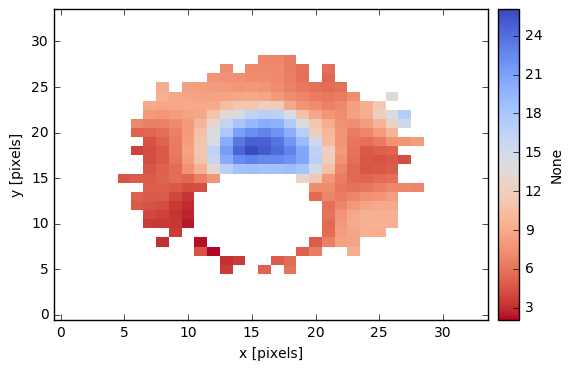

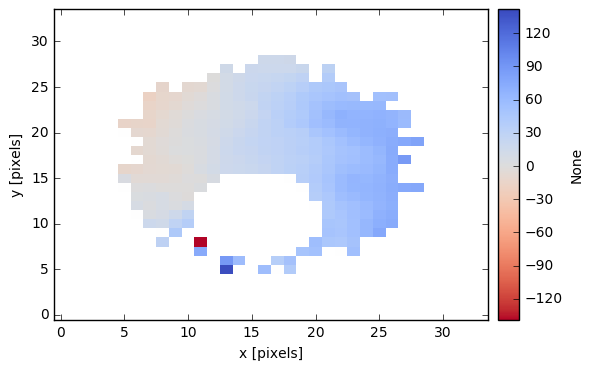

In [19]:
# From a cube, now we can do all things from Marvin Tools, like get a MaNGA MAPS object
maps = cube.getMaps()
print(maps)

# get a emission line sew map
em=maps.getMap('emline_sew', channel='ha_6564')
# plot it
em.plot()

# .. and a stellar velocity map
st=maps.getMap('stellar_vel')
# plot it
st.plot()

or since our results are from a spaxel query, we can convert to Marvin Spaxels

In [20]:
# let's convert to Marvin Spaxels.  Again, for brevity, let's only convert the first two.
r4.convertToTool('spaxel', limit=2)
print(r4.objects)

Converting results to Marvin Spaxel objects
[<Marvin Spaxel (x=17, y=15; x_cen=0, y_cen=-2>, <Marvin Spaxel (x=17, y=16; x_cen=0, y_cen=-1>]


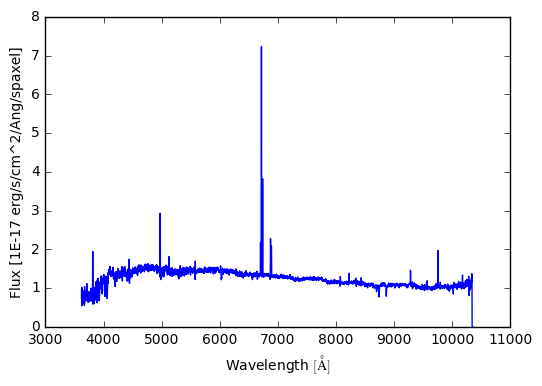

In [21]:
# Now we can do all the Spaxel things, like plot
spaxel = r4.objects[0]
spaxel.spectrum.plot()

You can also convert your query results into other formats like an Astropy Table, or FITS

In [29]:
r4.toTable()

mangaid,plate,plateifu,name,emline_sew_ha_6564,emline_gflux_hb_4862,stellar_vel,emline_gflux_ha_6564,z,x,y
unicode8,int64,unicode9,unicode4,float64,float64,float64,float64,float64,int64,int64
1-301579,8462,8462-1902,1902,23.0088329315,7.41308,21.5309,31.6974315643,0.023170914501,17,15
1-301579,8462,8462-1902,1902,22.4930744171,7.9739,25.152,33.9213638306,0.023170914501,17,16
1-301579,8462,8462-1902,1902,22.5101089478,8.46212,28.1003,37.1518554688,0.023170914501,17,17
1-301579,8462,8462-1902,1902,21.9120578766,7.81035,31.7994,33.5065727234,0.023170914501,17,18
1-301579,8462,8462-1902,1902,26.024564743,7.02141,22.8788,31.2817230225,0.023170914501,18,15
1-301579,8462,8462-1902,1902,25.1316452026,7.87042,26.6401,34.2383842468,0.023170914501,18,16
1-301579,8462,8462-1902,1902,24.2632751465,8.01464,28.7959,34.5796546936,0.023170914501,18,17
1-301579,8462,8462-1902,1902,22.8988399506,7.3722,32.3601,31.1150398254,0.023170914501,18,18
1-274545,8455,8455-3704,3704,46.6888847351,8.67696,43.8736,30.3356990814,0.0231080818921,17,18


In [34]:
r4.toFits('my_r4_results_2.fits')

Writing new FITS file my_r4_results_2.fits


## A note on Table and Name shortcuts
In Queries you must specify a **parameter_name** or **table.parameter_name**. However to make it a bit easier, we have created table shortcuts and parameter name shortcuts for a few parameters.  (more to be added..) 

* **ifu.name** = **ifudesign.name**
* **haflux** = **emline_gflux_ha_6564**
* **g_r** = **nsa.elpetro_mag_g_r**

## Retrieving Available Search Parameters
There are many parameters to search with.  You can retrieve a list of available parameters to query.  Please note that while currently many parameters in the list can technically be queried on, they have not been thoroughly tested to work, nor may they make any sense to query on.  We cannot guarantee what will happen.  If you find a parameter that should be queryable and does not work, please let us know.

In [4]:
# retrieve the list
allparams = q.get_available_params()
allparams

[u'maskbit.bit',
 u'maskbit.description',
 u'maskbit.flag',
 u'maskbit.label',
 u'maskbit_labels.flag',
 u'maskbit_labels.labels',
 u'maskbit_labels.maskbit',
 u'binid.id',
 u'spaxelprop.spaxelprops',
 u'spaxelprop.spaxelprops5',
 u'binmode.name',
 u'binmode.structures',
 u'bintype.name',
 u'bintype.structures',
 u'current_default.file',
 u'current_default.filename',
 u'current_default.filepath',
 u'executionplan.comments',
 u'executionplan.id',
 u'executionplan.structures',
 u'extcol.hdus',
 u'extcol.name',
 u'extname.hdus',
 u'extname.name',
 u'exttype.hdus',
 u'exttype.name',
 u'file.cube',
 u'file.current_default',
 u'file.filename',
 u'file.filepath',
 u'file.filetype',
 u'file.hdus',
 u'file.modelcube',
 u'file.num_ext',
 u'file.pipelineinfo',
 u'spaxelprop.spaxelprops',
 u'spaxelprop.spaxelprops5',
 u'file.structure',
 u'filetype.files',
 u'filetype.value',
 u'hdu.extcols',
 u'hdu.extname',
 u'hdu.extno',
 u'hdu.exttype',
 u'hdu.file',
 u'hdu.header_values',
 u'maps_header_keywo

## Additional Query and Results Functionality
* Save and Restore your Queries and Results similar to the other Marvin Tools
* Download query results
* For large results, page through them or grab a subset
* Extract parameters from your results as Python lists or dictionaries
* Sort your results by a given parameter
* Convert results to other formats: Marvin Objects, Astropy Table, FITS, JSON, Pandas Dataframe

# Web
Now let's play around with the web.  Go to https://sas.sdss.org/marvin2

## Main page
* There are helpful links to documentation, source code, and general information. 
* Select the **Release** you want to work with. Tested only MPL-4 and 5.  Set it to **MPL-5**
* Use the input **Plate/Galaxy ID** search box to find plates or galaxies. 

## Search page
* Here is where you can search using the same syntax has Marvin Queries: **try one of the queries we ran above**
* Search for parameters using the input boxes on the left.  One - dropdown list.  Two - autocomplete typing list
* Returns a table of results

## Plate page
* Go to plate **8485**.  The page loads with some basic plate meta-data and the set of galaxies observed on that plate. 


## Galaxy page
* Go to the page for **8485-1901**.  The page loads with some basic meta-data.  
* **Quality** and **Target** bits and flags.  Hover over the Flags to see a pop-up of the bitmask labels. 
    * **Green** - good science data
    * **Yellow** - warning some issues
    * **Red** - critical, do not use
* Toggle the **Map/Spectrum** display.  After some load time, you should see an interactive spectrum and maps.
* Mouse drag around in the spectrum display
* Click in the optical image to display that spaxel
* See the MAPS.  Click on a spaxel in any of the maps to display it in the spectrum viewer.  
* Try choosing 3 new maps to look at.
* Try changing the binning scheme for those maps.
    
## Image Roulette page
* This page shows a random sample of MaNGA galaxies.  Click to enjoy.   